In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception


In [3]:
def create_dataframe_digits(data_path):
    class_categories = {
        '0': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
    }
    image_paths = []
    image_outputs = []
    for category, output in class_categories.items():
        folder_path = os.path.join(data_path, category)      # data_path/category/
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            image_paths.append(image_path)
            image_outputs.append(output)
    df = pd.DataFrame({
        'path': image_paths,
        'output': image_outputs
    })
    return df






In [4]:
DATA_PATH='/content/drive/MyDrive/HandWritten/HandwrittenDataset'
train_df=create_dataframe_digits(os.path.join(DATA_PATH,'digits_train_set'))
test_df=create_dataframe_digits(os.path.join(DATA_PATH,'digits_test_set'))

In [5]:
IMG_DIM=128

def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')/255.0
    img = cv2.resize(img, (IMG_DIM, IMG_DIM))
    return img


In [6]:
def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

In [7]:
def read_images(img_paths):
    n = len(img_paths)
    X = np.zeros((n, IMG_DIM, IMG_DIM, 3), dtype='float32')
    for i in tqdm(range(n)):
        path = img_paths[i]
        img = imread(path)
        X[i] = img
    return X

In [8]:
x_train=read_images(train_df['path'])
y_train=train_df['output']
x_test=read_images(test_df['path'])
y_test=test_df['output']

100%|██████████| 1414/1414 [03:14<00:00,  7.27it/s]


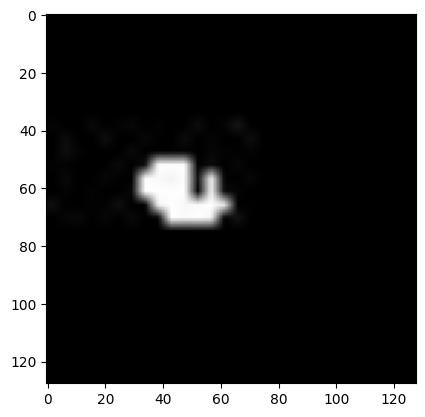

0


In [9]:
plt.imshow(x_train[20])
plt.show()
print(y_train[20])


In [10]:
# Load the pre-trained Xception model without the top layers
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_DIM, IMG_DIM, 3))

83683744/83683744 [==============================] - 0s 0us/step


In [11]:
# Freeze all the layers in the pre-trained model
for layer in xception_model.layers:
    layer.trainable = False



In [12]:
# Create a new model and add the pre-trained model as a feature extractor
model = tf.keras.models.Sequential()
model.add(xception_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(128, activation ='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
# Train the model with your dataset
model.fit(x_train, y_train, epochs=10)

model.save('handwritten.model')

model = tf.keras.models.load_model('handwritten.model')

test_loss, test_acc = model.evaluate(x_test, y_test)
 
print('Test accuracy:', test_acc)

y_pred=model.predict(x_test)


Epoch 1/10
207/207 [==============================] - 28s 45ms/step - loss: 0.4897 - accuracy: 0.8501
Epoch 2/10
207/207 [==============================] - 9s 43ms/step - loss: 0.1921 - accuracy: 0.9394
Epoch 3/10
207/207 [==============================] - 9s 43ms/step - loss: 0.1456 - accuracy: 0.9549
Epoch 4/10
207/207 [==============================] - 9s 44ms/step - loss: 0.1119 - accuracy: 0.9653
Epoch 5/10
207/207 [==============================] - 9s 44ms/step - loss: 0.0848 - accuracy: 0.9743
Epoch 6/10
207/207 [==============================] - 9s 44ms/step - loss: 0.0790 - accuracy: 0.9750
Epoch 7/10
207/207 [==============================] - 9s 45ms/step - loss: 0.0568 - accuracy: 0.9847
Epoch 8/10
207/207 [==============================] - 10s 46ms/step - loss: 0.0453 - accuracy: 0.9852
Epoch 9/10
207/207 [==============================] - 10s 47ms/step - loss: 0.0296 - accuracy: 0.9918
Epoch 10/10
207/207 [==============================] - 10s 47ms/step - loss: 0.0362 - ac

45/45 [==============================] - 3s 53ms/step - loss: 0.1517 - accuracy: 0.9710
Test accuracy: 0.9710042476654053
45/45 [==============================] - 3s 41ms/step


In [14]:
# Define a dictionary to map class indices to their corresponding labels
code = {'0':0 ,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

In [15]:

# Define a function to get the label for a given class index
def getcode(n):
    for x , y in code.items():
        if n == y:
            return x


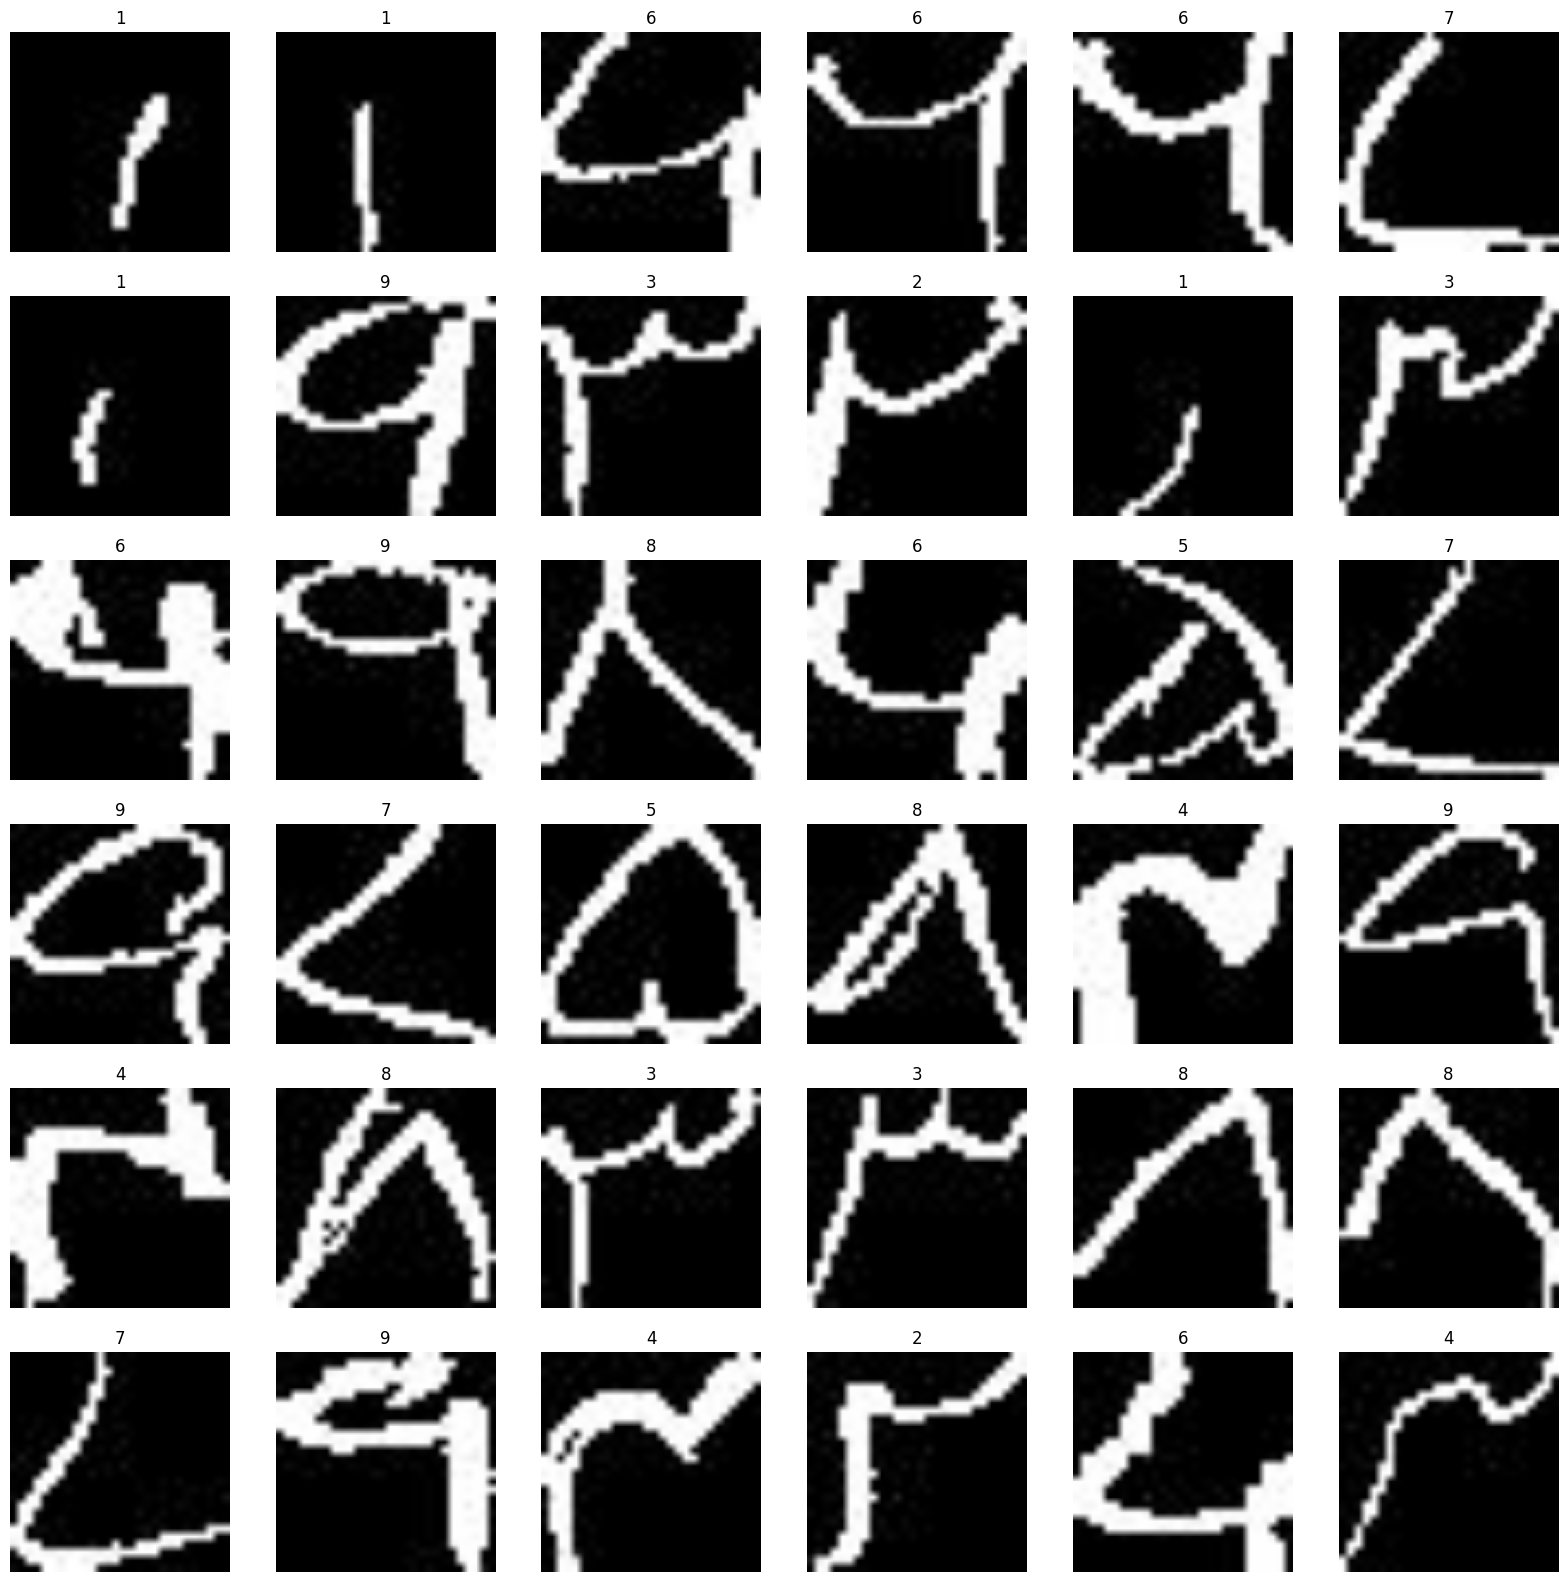

In [16]:
# Plot some example predictions
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(x_test),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))
    